<a target="_blank" href="https://colab.research.google.com/github/da-python/new-modul-python/blob/main/Lesson3/hometask/SyntheticRubber.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# !pip install yfinance

In [1]:
import yfinance as yf
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
crude_oil_ticker = "CL=F"
#Тянем стоимость евро и рубля
euro_usd = 'EURUSD=X'
usd_rub = 'RUB=X'
crude_oil = yf.Ticker(crude_oil_ticker)
#hist = crude_oil.history()
Oil_price_all = yf.download(crude_oil_ticker)
euro_price_all = yf.download(euro_usd)
rub_price_all = yf.download(usd_rub)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Синтетический каучук" (СК), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на СК. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


* СК производиться из нефти. Один из известных способов производства предполагает, что из 10 баррелей нефти сделают одну тонну СК, а затраты на производство в районе 400 евро.

In [3]:

# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    },
    #Добавил покупателя из России
    'Andrey':{
        'location':'RU',
        'volumes': 400,
        'comment': 'moving_average'
    }
}
# Скидки
discounts = {'99': 0.01, # до 100 тонн 1%
             '299': 0.05, #  до 300 тонн 5%
             '300': 0.1}   # больше 300 тонн 10%


### Что нужно сделать?

1. Определить базовую формулу цены на заводе. То есть как бы выглядела цена на исторических данных. 
* Важно, чтобы цена покрывала расходы на производство и при этом была в рынке, то есть на уровне натурального каучука или с небольшим дисконтом, котировки на который можно взять с сайта http://www3.lgm.gov.my/mre/MonthlyPrices.aspx (в центах за килограм). Можно перевести в доллары за тонну.
2. Отобразить на графике.
3. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
4. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 



In [ ]:
#Определить базовую формулу цены на заводе. То есть как бы выглядела цена на исторических данных.

In [4]:
#Создаем новые таблицы с датой и ценой на закрытии торгов
Oil_price = pd.DataFrame(Oil_price_all, columns = ['Close'])
euro_price = pd.DataFrame(euro_price_all, columns = ['Close'])
#объединяем в одну таблицу
oil_and_euro = pd.merge(Oil_price.reset_index(), euro_price.reset_index(), on=('Date') , how='inner')

In [5]:
# добавляем новый столбец с ценой по формуле 10 нефти на стоимость + 400 евро переведеные в $
oil_euro_cost = oil_and_euro.assign(cost = 10*oil_and_euro['Close_x']+ 400*oil_and_euro['Close_y'])

In [6]:
#оставляем только 2022
oil_euro_cost_2022 = oil_euro_cost[oil_euro_cost['Date']>='2022-01-01']
oil_euro_cost_2022 = oil_euro_cost_2022[oil_euro_cost_2022['Date']<'2023-01-01']
#сбрасываем индекс
oil_euro_cost_2022 = oil_euro_cost_2022.reset_index(drop=True)

In [7]:
# Котировки натурального каучука доступны на сайте,  https://www.lgm.gov.my
# также у них есть API, пример запроса ниже
# делаем цикл, чтобы вынуть все месяца 22 года
rubberprice=[]
for i in range(1,13):
    if len(str(i))==1:
        i=str(i)
        i= '0'+i
    else: i=str(i)
    print(i) 
    year = '2022'
    month = i
    url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={month}&year={year}"
    res = requests.get(url)
    rj = res.json()
    df =pd.DataFrame(rj)
    #df = pd.json_normalize(rj)
    rubberprice.append(df)
#записываем все в новую таблицу    
rubberprice_df =pd.concat(rubberprice, axis=0)
rubberprice_df = rubberprice_df.reset_index(drop=True) 
#df.head(10)

01
02
03
04
05
06
07
08
09
10
11
12


In [8]:
# отбираем только SMR CV , как базовый каучук
rubberprice_df_cv = rubberprice_df[rubberprice_df['grade']== 'SMR CV']
#сбрасываем индекс
rubberprice_df_cv = rubberprice_df_cv.reset_index(drop=True) 
#переводим к типу числа, иначе не посчитать
rubberprice_df_cv['us']=rubberprice_df_cv['us'].apply(pd.to_numeric)

#rubberprice_df_cv

In [9]:
# считаем стоимость в долларха за тонну, так как цент за кг, то нужно умножить на 1000 (перевод в тонну)
#и разделить на 100(Пперевести к доллару) , в итоге просто умножаем на 10
rubberprice_df_cv_new = rubberprice_df_cv.assign(USD = rubberprice_df_cv['us']*10)
#rubberprice_df_cv_total 
#оставляем только нужные нам колонки
rubberprice_df_cv_total= pd.DataFrame(rubberprice_df_cv_new, columns = ['date','USD'])
#rubberprice_df_cv_total

In [10]:
#отставляем только 22 год
rubberprice_df_cv_total_2022 = rubberprice_df_cv_total[rubberprice_df_cv_total['date']>='2022-01-01']
rubberprice_df_cv_total_2022 = rubberprice_df_cv_total[rubberprice_df_cv_total['date']<'2023-01-01']
#приводим к типу дата, чтобы можно соединять таблицы
rubberprice_df_cv_total_2022['date']=pd.to_datetime(rubberprice_df_cv_total_2022['date'])
#rubberprice_df_cv_total_2022

In [11]:
#соединяем таблицы воедино
total = pd.merge(oil_euro_cost_2022, rubberprice_df_cv_total_2022, left_on =('Date'), right_on =('date'),  how='inner')
#total

In [12]:
#делаем новую колонку сравнивая нашу цену и цену природного каучука марки SMR CV
total['compare'] = total['cost'] < total['USD']

In [13]:
total[total['compare'] == False]

,Date,Close_x,Close_y,cost,date,USD,compare


In [15]:
#таким образом наш продукт дешевле природного каучука

In [14]:
total

,Date,Close_x,Close_y,cost,date,USD,compare
0,2022-01-03,76.080002,1.137346,1215.738382,2022-01-03,2183.5,True
1,2022-01-04,76.989998,1.130224,1221.989765,2022-01-04,2231.5,True
2,2022-01-05,77.849998,1.128363,1229.844999,2022-01-05,2282.0,True
3,2022-01-06,79.459999,1.131350,1247.139864,2022-01-06,2305.5,True
4,2022-01-07,78.900002,1.129688,1240.875273,2022-01-07,2346.0,True
...,...,...,...,...,...,...,...
230,2022-12-23,79.559998,1.060333,1219.733181,2022-12-23,1891.0,True
231,2022-12-27,79.529999,1.064022,1220.908861,2022-12-27,1890.5,True
232,2022-12-28,78.959999,1.063717,1215.086651,2022-12-28,1866.0,True
233,2022-12-29,78.400002,1.062925,1209.170055,2022-12-29,1846.0,True


In [15]:
#возьмем только даты и нашу цену
total_plot = total[['Date','cost']]
total_plot = total_plot.round({'cost': 0})
#создаем ингдекс по датам
total_plot_graf = total_plot.set_index('Date')['cost']
#total_plot_graf

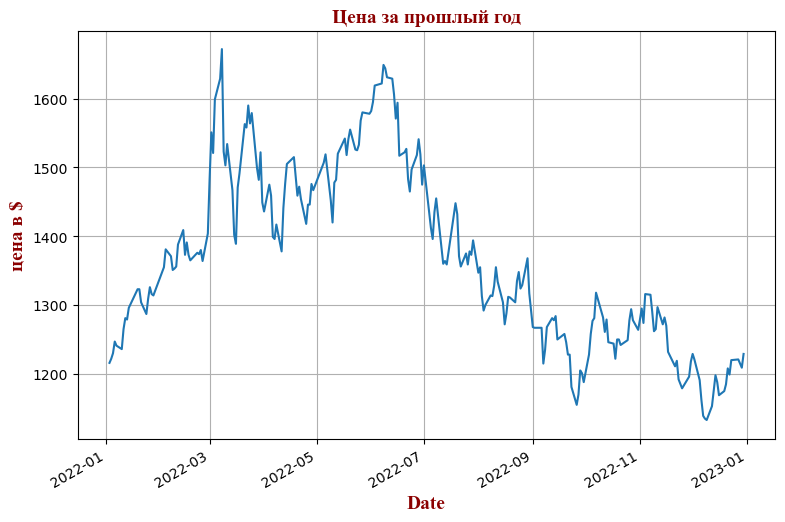

In [16]:
#Отобразить на графике строим график цены нашего продукта за 22 год.
#После урока, где показали усреднениние по месяцам, не стал так делать чтобы график был более интерестный
from pylab import rcParams
title_dict = {'fontsize':14, 
              'fontweight':'bold',
              'color':'DarkRed',
              'family':'Times New Roman'}
rcParams['figure.figsize'] = 9,6
plt.title('Цена за прошлый год', fontdict=title_dict)
plt.xlabel('Дата', fontdict=title_dict)
plt.ylabel('цена в $', fontdict=title_dict)
total_plot_graf.plot()
plt.grid()
plt.show()

In [17]:
#Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). 
#Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
# Расчет цены для клиентов, все клиенты в одной таблице
#Стоимость товара на запрашиваемый объем в миллионах долларов
#Сделал еще до урока где разобрали пример с порошком
total_cost_for_customers = oil_euro_cost_2022
for x in range(0,len(customers)):
    customer = customers[list(customers.keys())[x]]
    name_customer= list(customers.keys())[x]
    volum = customers[list(customers.keys())[x]]['volumes']
    if volum <= int(list(discounts.keys())[0]):
        sale = 1-(discounts[list(discounts.keys())[0]])
        #print(sale)
    elif volum > int(list(discounts.keys())[0]) and volum <= int(list(discounts.keys())[1]):
        sale = 1-(discounts[list(discounts.keys())[1]])
        #print(sale)
    elif volum >= int(list(discounts.keys())[2]):
        sale = 1-(discounts[list(discounts.keys())[2]])
    else: sale = 1
        #print(sale)
    if customers[list(customers.keys())[x]]['location'] == 'EU':
        region = EU_LOGISTIC_COST_EUR
    elif customers[list(customers.keys())[x]]['location'] == 'CN':
        region = CN_LOGISTIC_COST_USD
    else: region = 1
    total_cost_for_customers[name_customer] = total_cost_for_customers['cost'].apply(lambda x: 0.000001*x*volum*region*sale)
    #
total_cost_for_customers

,Date,Close_x,Close_y,cost,Monty,Triangle,Stone,Poly,Andrey
0,2022-01-03,76.080002,1.137346,1215.738382,6.929709,4.693966,5.197282,2.527520,0.437666
1,2022-01-04,76.989998,1.130224,1221.989765,6.965342,4.718102,5.224006,2.540517,0.439916
2,2022-01-05,77.849998,1.128363,1229.844999,7.010116,4.748432,5.257587,2.556848,0.442744
3,2022-01-06,79.459999,1.131350,1247.139864,7.108697,4.815207,5.331523,2.592804,0.448970
4,2022-01-07,78.900002,1.129688,1240.875273,7.072989,4.791019,5.304742,2.579780,0.446715
...,...,...,...,...,...,...,...,...,...
247,2022-12-23,79.559998,1.060333,1219.733181,6.952479,4.709390,5.214359,2.535825,0.439104
248,2022-12-27,79.529999,1.064022,1220.908861,6.959181,4.713929,5.219385,2.538270,0.439527
249,2022-12-28,78.959999,1.063717,1215.086651,6.925994,4.691450,5.194495,2.526165,0.437431
250,2022-12-29,78.400002,1.062925,1209.170055,6.892269,4.668606,5.169202,2.513865,0.435301


In [18]:
#Сделаем отдельный блок по записи данных в Excel и построения графика для клиента
#усредним значения по месяцам
total_cost_for_customers_for_excel = total_cost_for_customers
#меняем индекс на даты
total_cost_for_customers_for_excel.index = total_cost_for_customers_for_excel['Date']
#усредняем значения и перезаписываем таблицу таблицу
total_cost_for_customers_for_excel = total_cost_for_customers_for_excel.resample('M').mean()
#
#сбрасываем индекс
total_cost_for_customers_for_excel = total_cost_for_customers_for_excel.reset_index() 
#total_cost_for_customers_for_excel

In [19]:
#записываем в таблицу Excel
xlfilepath = 'prices_for_customers.xlsx'
with pd.ExcelWriter(xlfilepath, engine='xlsxwriter') as writer:
    #цикл для автоматического выбора покупателя
    for x in range(0,len(customers)):
        customer = customers[list(customers.keys())[x]]
        # имя покупателя
        name_customer= list(customers.keys())[x]
        #объемы
        volum = customers[list(customers.keys())[x]]['volumes']
        
        #расчет скидки
        if volum <= int(list(discounts.keys())[0]):
            sale = 100*(discounts[list(discounts.keys())[0]])
            #print(sale)
        elif volum > int(list(discounts.keys())[0]) and volum <= int(list(discounts.keys())[1]):
            sale = 100*(discounts[list(discounts.keys())[1]])
            #print(sale)
        elif volum >= int(list(discounts.keys())[2]):
            sale = 100*(discounts[list(discounts.keys())[2]])
        else: sale = 0
            #print(sale)
        # Стоимость доставки    
        if customers[list(customers.keys())[x]]['location'] == 'EU':
            region2 = EU_LOGISTIC_COST_EUR
        elif customers[list(customers.keys())[x]]['location'] == 'CN':
            region2 = CN_LOGISTIC_COST_USD
        else:
            region2 = 0
        #print(name_customer)
        # выбираем колонки даты, стоимость продукта и стоимость конечному клиенту на его объем по имени клиента
        customer_df = pd.DataFrame(total_cost_for_customers_for_excel, columns = ['Date', 'cost', name_customer])
        # переименовываем колонку имя клиента в Total_cost
        customer_df = customer_df.rename(columns = {name_customer : 'Total_cost'})
        #меняем тип дат для красоты на месяц - год
        customer_df.Date = customer_df.Date.dt.strftime('%B %Y')
        #customer_df
        # создаем график для каждого покупателя
        customer_df_graf = customer_df.set_index('Date')['Total_cost']
        title_dict = {'fontsize':14, 
                      'fontweight':'bold',
                      'color':'DarkRed',
                      'family':'Times New Roman'}
        rcParams['figure.figsize'] = 9,6
        plt.title('Цена за прошлый год', fontdict=title_dict)
        plt.xlabel('Дата', fontdict=title_dict)
        plt.ylabel('цена в миллионах $', fontdict=title_dict)
        customer_df_graf.plot()
        plt.grid()
        #plt.show()
        plt.savefig(f'{name_customer}_price.png')
        plt.close()
        
        # записываем все в файл
        max_row, max_col = customer_df.shape
        customer_df.to_excel(writer, sheet_name=name_customer, startrow=2, header=False, index=False)
        workbook = writer.book
        worksheet = writer.sheets[name_customer]
        # формат текста для заголовка
        cell_format = workbook.add_format({'bold': True, 'font_color': 'black', 'size':14})
        #В первую ячеку запишем инфо о покупателе объемах и скидках 
        worksheet.write('A1', f'Покупатель:{name_customer} Объем: {volum} Цена доставки: {region2} $, скидка: {sale}%. Общая цена в миллионах долларов', cell_format)
        # в А2 запишем среднюю цену за прошлый год, округляем до 2х знаков
        mean_cost_for_customer = round(customer_df['Total_cost'].mean(), 2)
        worksheet.write('A2', f'Средняя цена за прошлый год на заданный объем с учетом скидки и доставки:{mean_cost_for_customer} миллионов долларов', cell_format)
        # добавлем таблицу
        column_settings = [{'header': column} for column in customer_df.columns]
        worksheet.add_table(2, 0, max_row, max_col - 1, {'columns': column_settings})
        #вставляем график
        worksheet.insert_image(max_row + 4, 1, f'{name_customer}_price.png')

In [20]:
#Среднее значение в миллионах долларов за запрашиваемый объем с учетом скидок и доставки, 
#если она нужна для каждого клиента
# оставляем среднюю цену нефти и производства СК
#список клиентов формируем автоматически
#Оставил как справочную информацию
cust_list=['Close_x', 'cost']
for x in range(0,len(customers)):
    customer = customers[list(customers.keys())[x]]
    name_customer= list(customers.keys())[x]
    cust_list.append(name_customer)
#type(cust_list)
#total_cost_for_customers[cust_list].mean()

# Задание 2

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

In [3]:
# и так расщет идет автоматически, достаточно добавить клиентов в словарь  customers или изменив количесво закупаемого товара
# именно в словарь customers я добавил покупателя из России


# Задание 3

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать СК для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать СК с завода самостоятельно.
На основе тех данных, которые уже есть предложите цену новому клиенту в рублях. 



In [21]:
# вытягиваем стоимость рубля за 22 год
rub_price = pd.DataFrame(rub_price_all, columns = ['Close'])
rub_price = rub_price.reset_index()
rub_price_2022 = rub_price[rub_price['Date']>='2022-01-01']
rub_price_2022 = rub_price_2022[rub_price_2022['Date']<'2023-01-01']
rub_price_2022 = rub_price_2022.reset_index(drop=True)
#rub_price_2022

In [22]:
#Из нашей таблицы total_cost_for_customers забираем колонки даты и покупателя из России
#
rubberprice_2022 = pd.DataFrame(total_cost_for_customers, columns = ['Date' , 'Andrey'])
rubberprice_2022 = rubberprice_2022.reset_index(drop=True)
#rubberprice_2022

In [23]:
#объединям таблицы , добавляем стоимость рубля
rubberprice_2022_ru = pd.merge(rubberprice_2022, rub_price_2022, on=('Date') , how='inner')
#rubberprice_2022_ru
#oil_cost_2022.info()
#считаем стоимость для клиента в рублях
rubberprice_2022_ru_cost = rubberprice_2022_ru.assign(Andrey_ru = rubberprice_2022_ru['Andrey']*rubberprice_2022_ru['Close'])

rubberprice_2022_ru_cost

,Date,Andrey,Close,Andrey_ru
0,2022-01-03,0.437666,74.986000,32.818809
1,2022-01-04,0.439916,74.371803,32.717370
2,2022-01-05,0.442744,75.263000,33.322257
3,2022-01-06,0.448970,76.661598,34.418785
4,2022-01-07,0.446715,76.353699,34.108350
...,...,...,...,...
247,2022-12-23,0.439104,68.214996,29.953474
248,2022-12-27,0.439527,68.330002,30.032894
249,2022-12-28,0.437431,69.964996,30.604872
250,2022-12-29,0.435301,72.714996,31.652927


In [24]:
# Средняя цена для покупателя из России в миллионах рублей за прошлый год, округленная до 2х знаков:
ru_cost_mean = round(rubberprice_2022_ru_cost['Andrey_ru'].mean(),2)
print(f'Средняя цена для покупателя из России за прошлый год на запрашиваемый объем составила: {ru_cost_mean} миллионов рублей ')

Средняя цена для покупателя из России за прошлый год на запрашиваемый объем составила: 34.83 миллионов рублей 
